In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as rg
from scipy.integrate import quad
from math import pi, inf
from sympy import limit
from sympy.abc import x as xx
import time

In [2]:
# Parameters TSB-TI
a = 1/137
c = 1
w = 1
m1 = 1
m2 = 1
e1 = 1
e2 = 16
n1 = 1
n2 = np.sqrt(e2*m2)
theta1 = 0
theta2 = pi
delta = theta1 - theta2


# Parameters Lifetime
# a = 1/137
# c = 1
# m1 = 1
# m2 = m1*(np.sqrt(0.48**2 + 17.3**2)*4*pi*10**(-7) + 1)
# e1 = 1
# eaux = 8.85418782*10**(-12)
# maux = 1.25663706*10**(-6)
# n1 = 1
# n2 = 1.65
# theta1 = 0
# theta2 = pi
# delta = theta1 - theta2
# scale = (600/(2*pi*c))**(-1)
# w = 1
# e2 = 1.65**2/(c**2*m2)

In [3]:
def f1(theta):
    return m1*m2*(e2*m1 + e1*m2 + n1*n2*(np.sqrt((1-np.sin(theta)**2)/(1-(n1**2/n2**2)*np.sin(theta)**2)) + np.sqrt((1-(n1**2/n2**2)*np.sin(theta)**2)/(1-np.sin(theta)**2))))

def f2(theta):
    return m1*m2*(e2*m1 - e1*m2 + n1*n2*(np.sqrt((1-np.sin(theta)**2)/(1-(n1**2/n2**2)*np.sin(theta)**2)) - np.sqrt((1-(n1**2/n2**2)*np.sin(theta)**2)/(1-np.sin(theta)**2))))

def f3(theta):
    return m1*m2*(e1*m2 - e2*m1 + n1*n2*(np.sqrt((1-np.sin(theta)**2)/(1-(n1**2/n2**2)*np.sin(theta)**2)) - np.sqrt((1-(n1**2/n2**2)*np.sin(theta)**2)/(1-np.sin(theta)**2))))

def R_tmte(theta): 
    return (-2*m2*n1*delta)/(f1(theta) + delta**2)

def R_tmtm(theta): 
    return (f2(theta)+delta**2)/(f1(theta)+delta**2)
 
def R_tete(theta):
    return (f3(theta)+delta**2)/(f1(theta)+delta**2)

def R_tetm(theta):
    return (-2*m2*n1*delta)/(f1(theta) + delta**2)

In [4]:
def rho_z_integrand(theta, z):
    return ((np.sin(theta))**3)*(R_tmte(theta)**2 + np.abs((np.e**(-1j*n1*w*np.cos(theta)*z/c)+R_tmtm(theta)*np.e**(1j*n1*w*np.cos(theta)*z/c)) - ((R_tmte(theta)*(R_tmtm(theta) + R_tete(theta) + (2*np.sin(theta)**2)*np.e**(2j*n1*w*np.cos(theta)*z/c)))/(R_tmte(theta)**2+((1+np.cos(2*n1*w*np.cos(theta)*z/c))*R_tete(theta) + 1)**2))*(R_tmte(theta)*np.e**(1j*n1*w*np.cos(theta)*z/c)))**2)

def rho_x_integrand(theta, z):
        return ((np.sin(theta))*np.cos(theta)**2)*(R_tmte(theta)**2 - np.abs((np.e**(-1j*n1*w*np.cos(theta)*z/c) - R_tmtm(theta)*np.e**(1j*n1*w*np.cos(theta)*z/c)) - ((R_tmte(theta)*(R_tmtm(theta) + R_tete(theta) + (2*np.sin(theta)**2)*np.e**(2j*n1*w*np.cos(theta)*z/c)))/(R_tmte(theta)**2+((1+np.cos(2*n1*w*np.cos(theta)*z/c))*R_tete(theta) + 1)**2))*(-1*R_tmte(theta)*np.e**(1j*n1*w*np.cos(theta)*z/c)))**2)


def rho_y_integrand(theta, z):
    return (np.abs(1+R_tete(theta)*np.e**(-2j*n1*w*np.cos(theta)*z/c))**2 - np.abs((R_tetm(theta)*np.e**(1j*n1*w*np.cos(theta)*z/c)) - ((R_tmte(theta)*(R_tmtm(theta) + R_tete(theta) + (2*np.sin(theta)**2)*np.e**(2j*n1*w*np.cos(theta)*z/c)))/(R_tmte(theta)**2+((1+np.cos(2*n1*w*np.cos(theta)*z/c))*R_tete(theta) + 1)**2))*(np.e**(-1j*n1*w*np.cos(theta)*z/c) + R_tete(theta)*np.e**(1j*n1*w*np.cos(theta)*z/c)))**2)


In [5]:
def rho_z(z):
    return quad(rho_z_integrand, 0, pi/2, args=(z,))

def rho_x(z):
    return quad(rho_x_integrand, 0, pi/2, args=(z,))

def rho_y(z):
    return quad(rho_y_integrand, 0, pi/2, args=(z,))

In [6]:
print(rho_z(0))
print(rho_y(0))
print(rho_x(0))

(0.6880667931852221, 2.0949146944152115e-10)
(-2.739929304878202, 2.106585989142216e-09)
(-0.11202756544305291, 7.67767656846103e-09)


In [13]:
start = time.time()
x = np.arange(0,10, 0.01)
y_perp = np.array([z[0] for z in list(map(rho_z, x))])
end = time.time()
print('elapsed time for z: {} seg'.format(end - start))

start = time.time()
y_x = np.array([z[0] for z in list(map(rho_x, x))])
end = time.time()
print('elapsed time for x: {} seg'.format(end - start))

start = time.time()
y_y = np.array([z[0] for z in list(map(rho_y, x))])
end = time.time()
print('elapsed time for y: {} seg'.format(end - start))

elapsed time for z: 53.32017397880554 seg
elapsed time for x: 49.43734884262085 seg
elapsed time for y: 62.630348920822144 seg


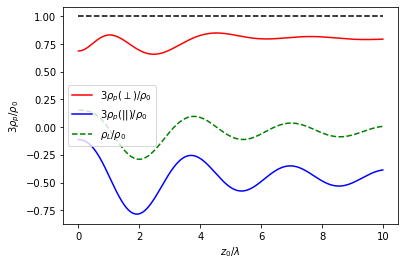

In [13]:
y_parall = (y_y + y_x)/2
y_ldos = (2*y_parall + y_perp)/3

y_parall = y_x
y_ldos = (2*y_parall + y_perp)/3

fig, ax = plt.subplots()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

base_line, = ax.plot(x, [1 for z in x], linestyle='--', color= 'black')
perp, = ax.plot(x, y_perp, label=r'$3\rho_p(\perp)/\rho_0$', color= 'red') 
parall, = ax.plot(x, y_parallparall, label=r'$3\rho_p(||)/\rho_0$', color= 'blue')
ldos, = ax.plot(x, y_ldos, linestyle='--', label=r'$\rho_L/\rho_0$', color= 'green')

ax.legend(handles=[perp, parall, ldos], prop={'size': 10})
ax.set_xlabel(r'$z_0/\lambda$')
ax.set_ylabel(r'$3\rho_p/\rho_0$')
plt.show()

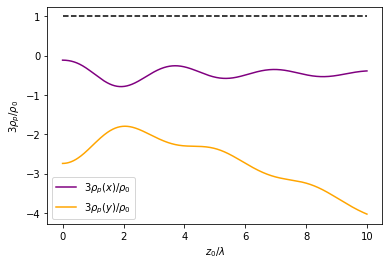

In [14]:
fig, ax = plt.subplots()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

base_line, = ax.plot(x, [1 for z in x], linestyle='--', color= 'black')
perp, = ax.plot(x, y_x, label=r'$3\rho_p(x)/\rho_0$', color= 'purple') 
parall, = ax.plot(x, y_y, label=r'$3\rho_p(y)/\rho_0$', color= 'orange')

ax.legend(handles=[perp, parall], prop={'size': 10})
ax.set_xlabel(r'$z_0/\lambda$')
ax.set_ylabel(r'$3\rho_p/\rho_0$')
plt.show()

elapsed time for y: 66.14644074440002 seg


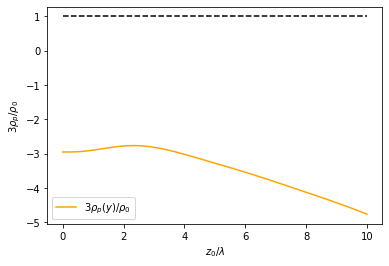

In [16]:
def rho_y_integrand(theta, z):
    return (np.abs(1+R_tete(theta)*np.e**(-2j*n1*w*np.cos(theta)*z/c))**2 - np.abs((R_tetm(theta)*np.e**(1j*n1*w*np.cos(theta)*z/c)) - ((R_tmte(theta)*(R_tmtm(theta) + R_tete(theta) + (2*np.sin(theta)**2)*np.e**(2j*n1*w*np.cos(theta)*z/c)))/(R_tmte(theta)**2+((1+np.cos(2*n1*w*np.cos(theta)*z/c))*R_tete(theta) + 1)**2))*(np.e**(-1j*n1*w*np.cos(theta)*z/c) + R_tete(theta)*np.e**(1j*n1*w*np.cos(theta)*z/c)))**2)

def rho_y(z):
    return quad(rho_y_integrand, 0, pi/2, args=(z,))

start = time.time()
y_y = np.array([z[0] for z in list(map(rho_y, x))])
end = time.time()
print('elapsed time for y: {} seg'.format(end - start))

fig, ax = plt.subplots()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

base_line, = ax.plot(x, [1 for z in x], linestyle='--', color= 'black')
#perp, = ax.plot(x, y_x, label=r'$3\rho_p(x)/\rho_0$', color= 'purple') 
parall, = ax.plot(x, y_y, label=r'$3\rho_p(y)/\rho_0$', color= 'orange')

ax.legend(handles=[parall], prop={'size': 10})
ax.set_xlabel(r'$z_0/\lambda$')
ax.set_ylabel(r'$3\rho_p/\rho_0$')
plt.show()